# Basic Text Processing with NLTK
### Detecting either spam or ham using pipeline

## Importing Libraries

In [56]:
import nltk
import pandas as pd

In [57]:
#nltk.download_shell()

#### *Importing Text from Corpus and Convert into list in 'messages Variable

In [58]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [59]:
print(len(messages))

5574


In [60]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [61]:
for num,message in enumerate(messages[:5]):
    print(num,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though




### **Since separator of each string was tab, we could convert them as dataframe using pandas

In [62]:
msg = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [63]:
msg.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
msg.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [65]:
 msg.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [66]:
msg['length'] = msg['message'].apply(len)

In [67]:
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## 1. Exploratory Data Analysis (EDA)

#### **Plot length of messages

<AxesSubplot:ylabel='Frequency'>

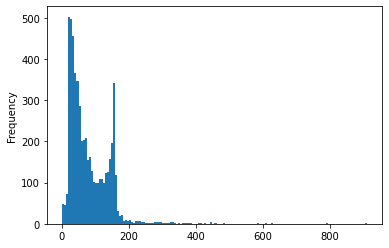

In [68]:
msg['length'].plot.hist(bins=150)

In [69]:
msg['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [70]:
msg[msg['length'] > 900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

#### Pandas data viz's subplot by column 

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

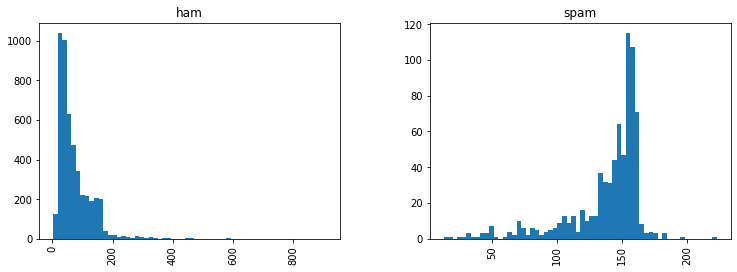

In [71]:
msg.hist(column='length',by='label',bins=60,figsize=(12,4))

#### *we could conclude that spam message character tend to have length longer than ham's character

In [72]:
import string

In [73]:
mess = 'Example Message ! Notice : Message, Contain a punctuation.'

## 2. Text Processing 
### 2.1. Remove All Punctuation in Sentence.

In [51]:
nopunc = [c for c in mess if c not in string.punctuation]
nopunc

['E',
 'x',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'C',
 'o',
 'n',
 't',
 'a',
 'i',
 'n',
 ' ',
 'a',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

### 2.2. Remove all stopwords.

#### ** Stopwords in NLTK is a list of collection word which does not add much meaning to a sentence. These word can safely be ignored without sacrificing the meaning of the sentence.

In [18]:
from nltk.corpus import stopwords

In [20]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### *Joining back a list into one string without a punctuation

In [43]:
x = ['a','b','c'] #Example usage of join in string function

In [45]:
'*'.join(x)       #Join splitted string with separator

'a*b*c'

#### *Apply join function into our list string

In [21]:
nopunc = ''.join(nopunc)

In [46]:
nopunc

'Example Message  Notice  Message Contain a punctuation'

In [47]:
nopunc.split()

['Example', 'Message', 'Notice', 'Message', 'Contain', 'a', 'punctuation']

#### *Clean any existing stopwords from our word list in nopunc with lowercase

In [48]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [49]:
clean_mess

['Example', 'Message', 'Notice', 'Message', 'Contain', 'punctuation']

#### *Define a 'stopwords_removal' function to be applied to all column from our dataframe.

In [113]:
def stopwords_removal(msg):
    '''
    1. Remove Punctuation
    2. Remove Stop words
    3. Return list of clean text words
    '''
    
    nopunc = [c for c in msg if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_msg = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_msg

#### *Apply to our dataframe

In [82]:
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [84]:
msg['message'].head(5).apply(stopwords_removal)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### 3.2. Vectorization (CountVectorizer)

#### *In here we're gonna transform our dataframe into a new dataframe (imagine 2-Dimensional Matrix, where 1 Dimensional is the entire vocabulary (1-Row per word) and the other dimension is the actual documents

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


In [77]:
from sklearn.feature_extraction.text import CountVectorizer

#### **With count vectorizer we could count occurence of the word in a sentence, in this case we passing a previous function which removing any punctuation and stop words fit into our dataframe and convert into 2 Dimensional array where we could vectorize any word occurence in each column.

#### Below we initialize our Countvectorizer object

In [112]:
bags_transformer = CountVectorizer(analyzer=stopwords_removal).fit(msg['message'])

In [96]:
print(len(bags_transformer.vocabulary_))

11425


#### *Take notice that we have 11425 unique word in our vocabulary based on for each message in dataframe

In [92]:
msg4 = msg['message'][3]
print([msg4])

['U dun say so early hor... U c already then say...']


#### ** Apply our count vectorizer object on single message, (require input as iterable list).

In [107]:
bags4 = bags_transformer.transform([msg4])

In [95]:
print(bags4)
print(bags4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


#### From a shape we could consider that in the [msg4] we're just passed in contain a word in vocabulary on index 4068,4629,...,9554. We could check for each index message, for example like below :

In [98]:
print(bags_transformer.get_feature_names()[4068])
print(bags_transformer.get_feature_names()[9554])

U
say


#### *In vocabulary index- 4068 is a word 'U' which 2 times occurence, as we could see in the sentences we're passed in :
['U dun say so early hor... U c already then say...']

#### *Now we could transform the entire DataFrame Messages.

In [99]:
msg_bags = bags_transformer.transform(msg['message'])

In [104]:
print('Shape of Sparse Matrix: ', msg_bags.shape)
print('Amount of Non-Zero occurences: ', msg_bags.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [105]:
sparsity = (100.0 * msg_bags.nnz / (msg_bags.shape[0] * msg_bags.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


## 4.2. TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [106]:
from sklearn.feature_extraction.text import TfidfTransformer

In [124]:
tfidf_transformer = TfidfTransformer().fit(msg_bags)

#### *Transform Word Frequencies of bags4 into Tfidf, remember that bags4 contain a occurencies of each word message 4, and we're gonna turn into tfidf, these number represent as a weight value for each these word vs actual document (entire word in document transformer vs msg4).

In [127]:
print([msg4])

['U dun say so early hor... U c already then say...']


In [128]:
tfidf4 = tfidf_transformer.transform(bags4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [122]:
print(tfidf_transformer.idf_[bags_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bags_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [130]:
messages_tfidf = tfidf_transformer.transform(msg_bags)

## 3. Train Spam vs Ham detector

In [131]:
from sklearn.naive_bayes import MultinomialNB

#### Using naive bayes detector we pass entire tfidf of dataframe, and label column of msg as classes.

In [134]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,msg['label'])

#### **Try to classify of tfidf4 of message ['U dun say so early hor... U c already then say...'] either it is ham or spam

In [136]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [137]:
msg['label'][3]

'ham'

#### *Predicted label of msg4 is ham and actual expected label is also ham, this because we trained entire all dataset and testing/evaluate a data which contain/same in training data that in real we should never done that.

In [139]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [140]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

#### Proper way to do measure evaluation of prediction we should use train and split as usual.

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
msg_train,msg_test,label_train,label_test = train_test_split(msg['message'],msg['label'],test_size=0.3)

#### Check train data

In [143]:
msg_train

5336    Sounds better than my evening im just doing my...
4144    In The Simpsons Movie released in July 2007 na...
5363    I think your mentor is , but not 100 percent s...
246     Too late. I said i have the website. I didn't ...
4156    Want a new Video Phone? 750 anytime any networ...
                              ...                        
1396    Thats cool! I am a gentleman and will treat yo...
306     Yup... From what i remb... I think should be c...
2587    If you don't respond imma assume you're still ...
2023    U can WIN £100 of Music Gift Vouchers every we...
436     The message sent is askin for  &lt;#&gt; dolla...
Name: message, Length: 3900, dtype: object

** Take a note as usual if we want to perform train and evaluate the model(text-based data) we need to repeat previous step such remove stop_words, punctuation, do Vectorization in this case CountVectorizer (bags_transformer) and do TFIDF to obatain weighted per word vs entire data, but instead we could use train pipeline that we don't need to repeat these process again.

### 3.1. Train Pipeline

In [145]:
from sklearn.pipeline import Pipeline

In [146]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=stopwords_removal)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

#### *Instead doing manual all process we use pipeline where we define per every process within, we no longer worried about manually doing count vectorization or tfidf.

In [147]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function stopwords_removal at 0x7f20cd6aab70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [148]:
pipe_predict = pipeline.predict(msg_test)

In [149]:
from sklearn.metrics import classification_report

In [150]:
print(classification_report(label_test,pipe_predict))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1452
        spam       1.00      0.74      0.85       220

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.96      1672



#### ** we also can use another classifier such random forest, etc..
#### Basically pipeline is just a shorten way to encapsulate these sequential steps.

Now instead of using this function below :
***
<br>vect = CountVectorizer()
<br>tfidf = TfidfTransformer()
<br>clf = SGDClassifier()

<br>vX = vect.fit_transform(Xtrain)
<br>tfidfX = tfidf.fit_transform(vX)
<br>predicted = clf.fit_predict(tfidfX)

<br>vX = vect.fit_transform(Xtest)
<br>tfidfX = tfidf.fit_transform(vX)
<br>predicted = clf.fit_predict(tfidfX)
***
it would rather using pipeline :
***
<br>pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])
<br>predicted = pipeline.fit(Xtrain).predict(Xtrain)
<br>predicted = pipeline.predict(Xtest)
***